<a href="https://colab.research.google.com/github/akbhagaw/data_analysis/blob/main/india_car_sales_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# we have number of india's car sales data set of 2024.
# 1. we want to highest number sold car in 2024


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google import colab


In [3]:
dataset= pd.read_csv('/content/drive/MyDrive/data/Car_Sales_India_2024.csv')
dataset.head()


,Make,Model,January,February,March,April,May,June,July,August,September,October,November,December,Total,Segment,Body Type,MoM %,YoY %
0,Citroen,Basalt,0,0,0,0,0,0,0,579,341,221,47,79,1267,C2,SUV,68,0
1,Citroen,C3,234,211,265,251,155,77,90,507,300,300,200,300,2890,C1,Hatchback,50,-3
2,Citroen,Aircross,231,127,211,93,125,136,68,38,41,103,201,96,1470,C2,SUV,-52,-72
3,Citroen,C5 Aircross,1,0,0,1,0,0,0,1,1,4,0,1,9,D2,SUV,0,-50
4,Citroen,e-C3,184,83,530,59,235,126,177,150,28,89,61,90,1812,C1,SUV,48,0


In [4]:
# check the data info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Make       87 non-null     object
 1   Model      87 non-null     object
 2   January    87 non-null     object
 3   February   87 non-null     object
 4   March      87 non-null     object
 5   April      87 non-null     object
 6   May        87 non-null     object
 7   June       86 non-null     object
 8   July       87 non-null     object
 9   August     87 non-null     object
 10  September  87 non-null     object
 11  October    87 non-null     object
 12  November   87 non-null     object
 13  December   87 non-null     object
 14  Total      87 non-null     int64 
 15  Segment    87 non-null     object
 16  Body Type  87 non-null     object
 17  MoM %      87 non-null     int64 
 18  YoY %      87 non-null     int64 
dtypes: int64(3), object(16)
memory usage: 13.0+ KB


In [5]:
# highest number of sales
highest_sales = dataset['Total'].max()
highest_sales

202031

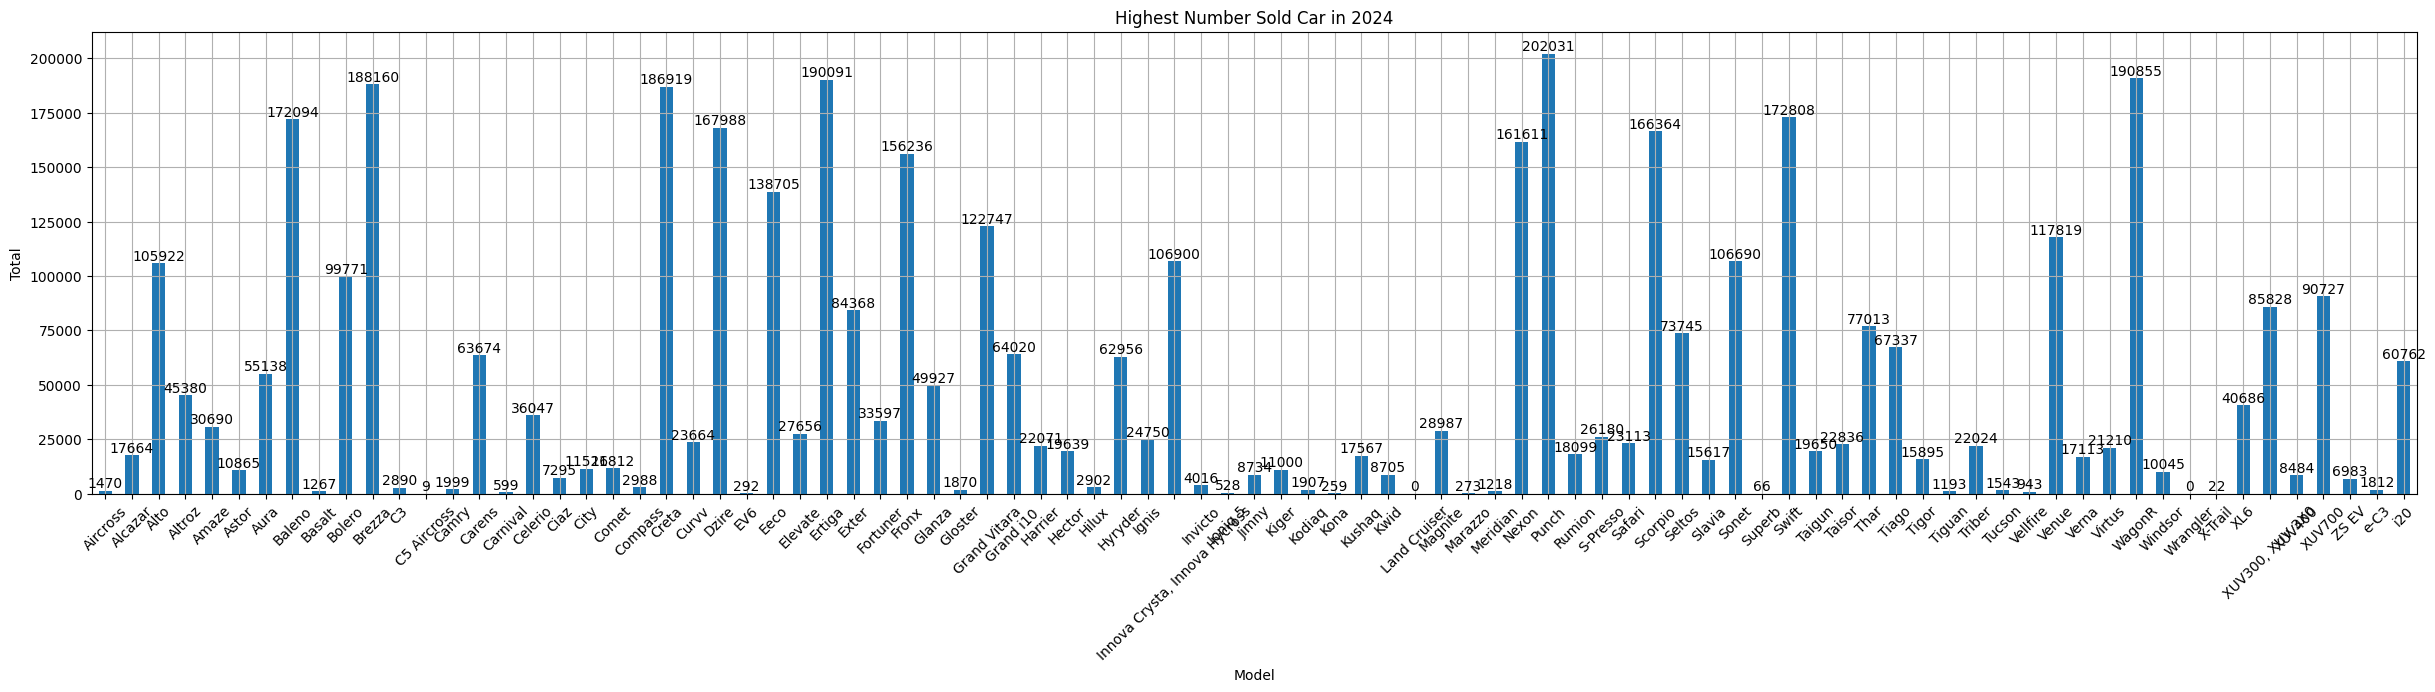

In [6]:
# Highest number saling model
highest_sale_model= dataset.groupby('Model')['Total'].max()
highest_sale_model
# plot the hishest_sale_model
plt.figure(figsize=(30, 6))
highest_sale_model.plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Total')
plt.title('Highest Number Sold Car in 2024')
# put value on bar
for i, v in enumerate(highest_sale_model):
  plt.text(i, v, str(v), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [7]:
# highest number sold by car maker in year 2024
highest_sale_make= dataset.groupby(['Make'])['Total'].sum()
highest_sale_make
# plot highest sale car make
# plt.figure(figsize=(10, 6))
# plt.bar(highest_sale_make.index, highest_sale_make.values)

# plt.xlabel('Make')
# plt.ylabel('Total Number Sold')
# plt.title('Highest Number Sold Car Maker in 2024')
# plt.grid(True)
# plt.xticks(rotation=45)
# for i, v in enumerate(highest_sale_make):
#   plt.text(i, v, str(v), ha='center', va='bottom')
# plt.show()

,Total
Make,
Citroen,7448
Honda,69872
Hyundai,606133
Jeep,4206
Kia,245000
MG,61214
Mahindra,528460
Maruti,1753314
Nissan,29009


In [8]:
import pandas as pd

# Load the dataset
dataset= pd.read_csv('/content/drive/MyDrive/data/Car_Sales_India_2024.csv')

# Clean up column names by stripping whitespace
dataset.columns = dataset.columns.str.strip()

# List of monthly sales columns (now without trailing spaces)
monthly_columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Remove commas and convert monthly sales columns to numeric
for col in monthly_columns:
    print(f"Processing column: '{col}'") # Added print statement for debugging
    dataset[col] = dataset[col].astype(str).str.replace(',', '', regex=False)
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

# Select the columns for each quarter
Q1_sale = dataset[['January', 'February', 'March']]
Q2_sale = dataset[['April', 'May', 'June']]
Q3_sale = dataset[['July', 'August', 'September']]
Q4_sale = dataset[['October', 'November', 'December']]

# Display the head of each quarterly DataFrame to verify
display(Q1_sale.head())
display(Q2_sale.head())
display(Q3_sale.head())
display(Q4_sale.head())

Processing column: 'January'
Processing column: 'February'
Processing column: 'March'
Processing column: 'April'
Processing column: 'May'
Processing column: 'June'
Processing column: 'July'
Processing column: 'August'
Processing column: 'September'
Processing column: 'October'
Processing column: 'November'
Processing column: 'December'


,January,February,March
0,0,0,0
1,234,211,265
2,231,127,211
3,1,0,0
4,184,83,530


,April,May,June
0,0,0,0.0
1,251,155,77.0
2,93,125,136.0
3,1,0,0.0
4,59,235,126.0


,July,August,September
0,0,579,341
1,90,507,300
2,68,38,41
3,0,1,1
4,177,150,28


,October,November,December
0,221,47,79
1,300,200,300
2,103,201,96
3,4,0,1
4,89,61,90


In [9]:
# Group by 'Make' and sum the sales for January, February, and March
Q1_sale_by_make = dataset.groupby('Make')[['January', 'February', 'March']].sum()

q1_total_sale= Q1_sale_by_make.sum()

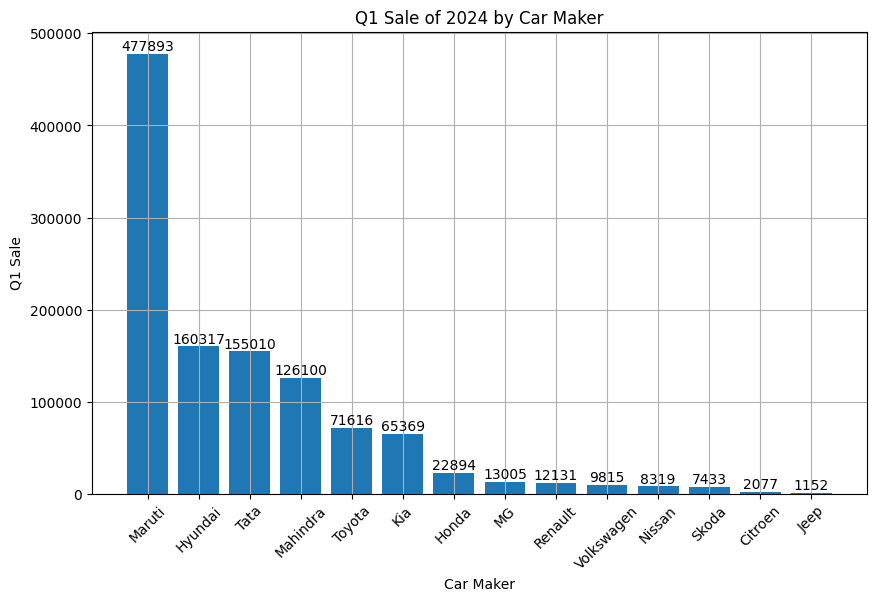

In [10]:
# sum of column january, column february, column march values
dataset['Q1_sale'] = dataset['January'] + dataset['February']+dataset['March']

q1_total_sale_by_make= dataset.groupby('Make')['Q1_sale'].sum().reset_index()
q1_total_sale_by_make.sort_values(by ='Q1_sale', ascending=False, inplace= True)
# plot Q1 Sale of 2024 by car maker
plt.figure(figsize=(10, 6))
plt.bar(q1_total_sale_by_make["Make"], q1_total_sale_by_make['Q1_sale'])
plt.xlabel('Car Maker')
plt.ylabel("Q1 Sale")
plt.title("Q1 Sale of 2024 by Car Maker")
plt.grid(True)
plt.xticks(rotation=45)
for i, v in enumerate(q1_total_sale_by_make['Q1_sale']):
  plt.text(i, v, str(v) , ha='center', va= 'bottom')

plt.show()

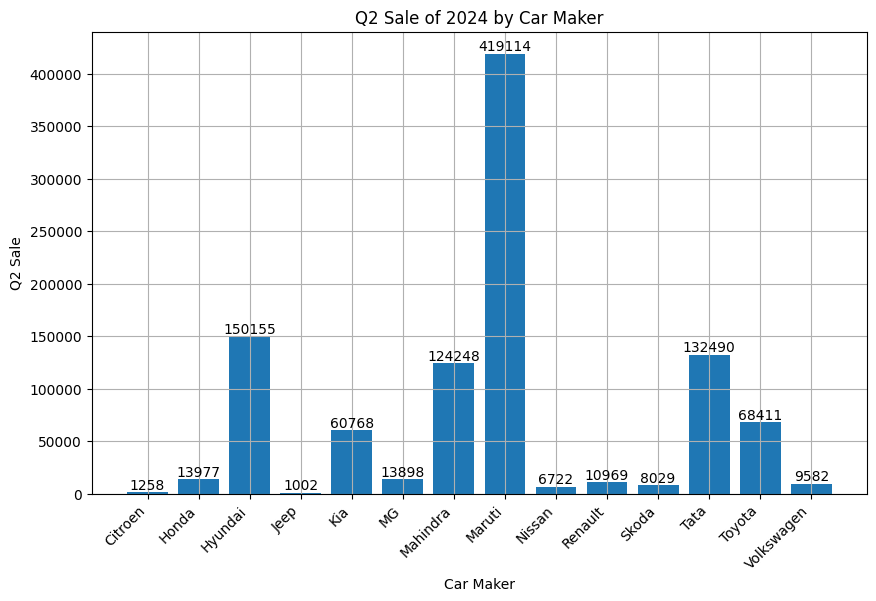

In [11]:
dataset['Q2_sale']= dataset['April']+dataset['May']+dataset['June']
q2_total_sale_by_make= dataset.groupby('Make')[['Q1_sale', 'Q2_sale']].sum().reset_index()
q2_total_sale_by_make
# plot Q2 Sale of 2024 by car maker
# Plotting with explicitly increased figure size
plt.figure(figsize=(10, 6)) # Increased figure width
plt.bar(q2_total_sale_by_make['Make'], q2_total_sale_by_make['Q2_sale'])
plt.xlabel('Car Maker')
plt.ylabel("Q2 Sale")
plt.title("Q2 Sale of 2024 by Car Maker")
plt.grid(True)
plt.xticks(rotation=45, ha='right') # Adjusted rotation and alignment

# Add text annotations to the bars
for i, v in enumerate(q2_total_sale_by_make['Q2_sale']):
    plt.text(i, v, str(int(v)), ha='center', va='bottom') # Adjusted horizontal alignment



plt.show()

In [12]:
q1_q2_sale= q2_total_sale_by_make
q1_q2_sale

,Make,Q1_sale,Q2_sale
0,Citroen,2077,1258.0
1,Honda,22894,13977.0
2,Hyundai,160317,150155.0
3,Jeep,1152,1002.0
4,Kia,65369,60768.0
5,MG,13005,13898.0
6,Mahindra,126100,124248.0
7,Maruti,477893,419114.0
8,Nissan,8319,6722.0
9,Renault,12131,10969.0


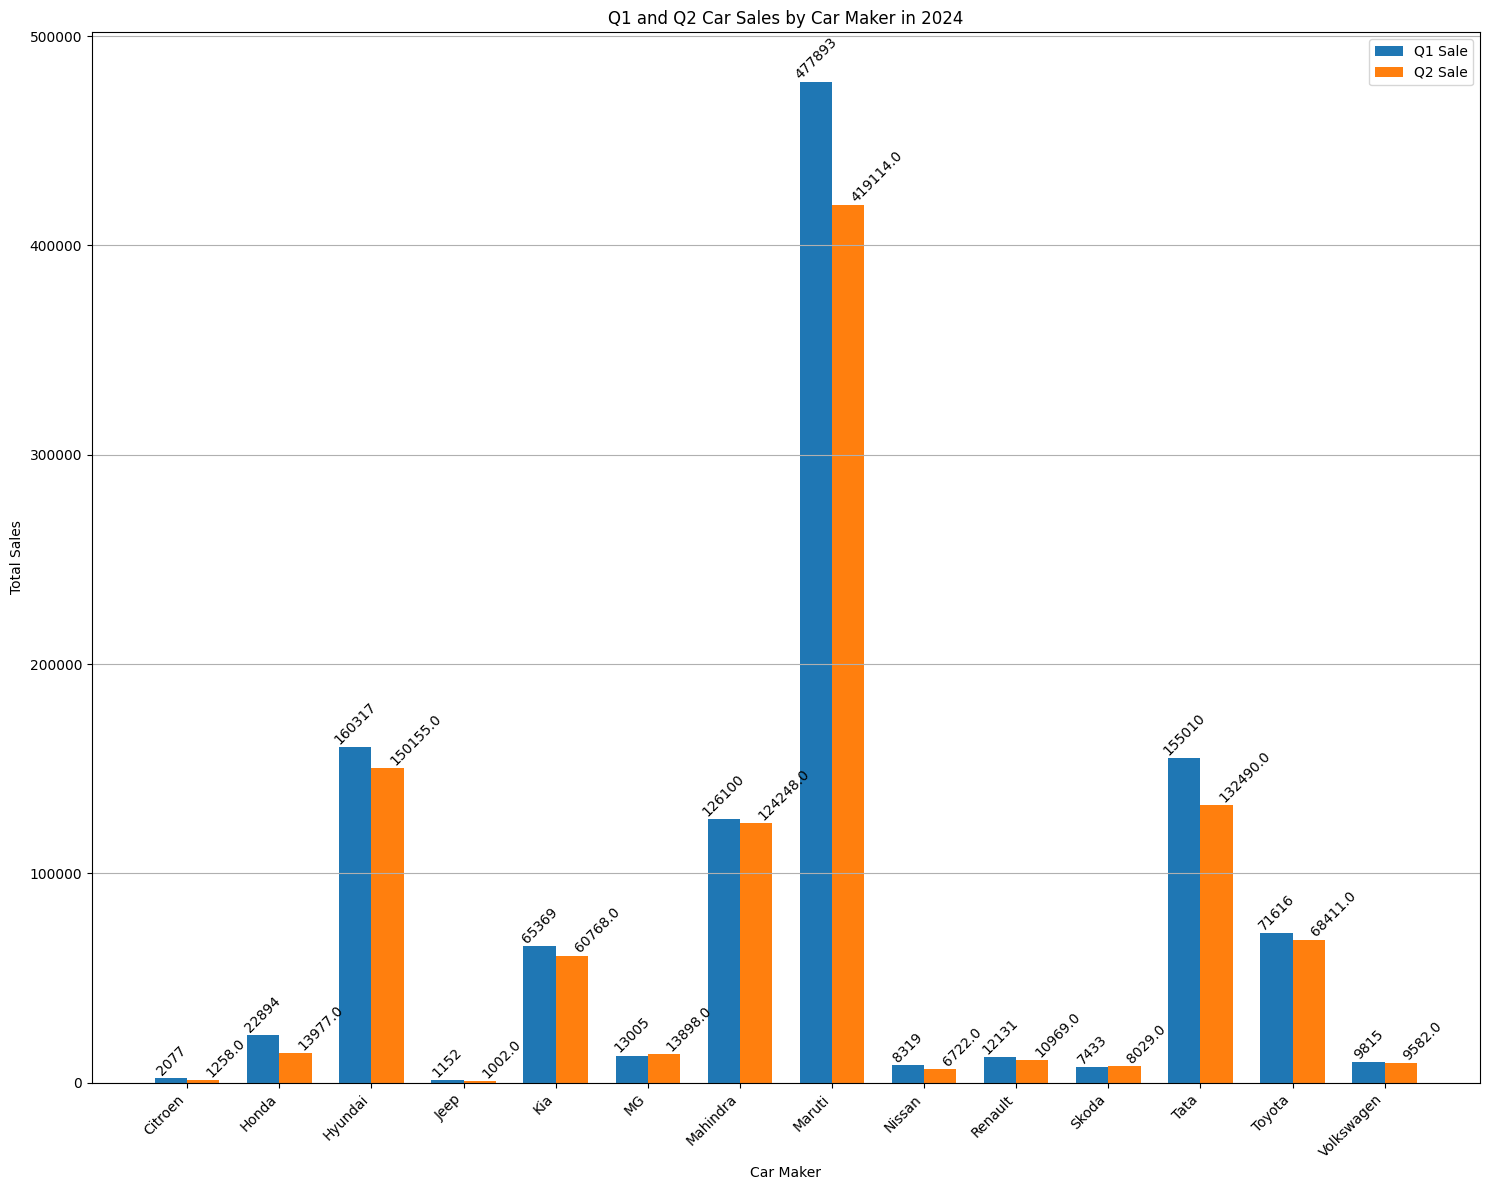

In [13]:
# plot chart of q1 and q2 number of car sale by car maker
plt.figure(figsize=(15, 12))

bar_width = 0.35 # Set the width of the bars
index = range(len(q1_q2_sale['Make'])) # Get the positions for the groups of bars

# Plot Q1 bars
plt.bar([i - bar_width/2 for i in index], q1_q2_sale['Q1_sale'], bar_width, label='Q1 Sale')

# Plot Q2 bars
plt.bar([i + bar_width/2 for i in index], q1_q2_sale['Q2_sale'], bar_width, label='Q2 Sale')


plt.xlabel('Car Maker')
plt.ylabel('Total Sales')
plt.title('Q1 and Q2 Car Sales by Car Maker in 2024')
plt.xticks(index, q1_q2_sale['Make'], rotation=45, ha='right') # Set the x-axis ticks to be the car makers
plt.legend() # Add a legend to distinguish Q1 and Q2 bars
plt.grid(True, axis='y') # Add a grid for better readability
for i, v in enumerate(q1_q2_sale['Q1_sale']):
  plt.text(i -bar_width/2, v, str(v), ha= 'center', va= 'bottom', rotation=45)
for i, v in enumerate(q1_q2_sale['Q2_sale']):
  plt.text(i +bar_width/2, v, str(v), ha= 'left', va= 'bottom', rotation=45)
plt.tight_layout() # Adjust layout to prevent labels overlapping

plt.show()

In [14]:
# Okay, I can create some questions based on the car sales dataset you're working with. These questions can be answered by analyzing the data:

# What is the total number of cars sold in India in 2024 (based on this dataset)?
# Which car maker had the highest total sales in 2024?
# Which car model was the best-seller in 2024?
# How did the total car sales change from Q1 to Q2 in 2024?
# Which car maker had the most significant increase or decrease in sales between Q1 and Q2?
# What is the distribution of car sales across different segments (e.g., C1, C2, D2, Premium)?
# What is the most popular body type (e.g., SUV, Hatchback, Sedan, MUV) among the sold cars?
# How do the sales of a specific car maker compare across different months or quarters?
# Which car maker has the highest average monthly sales?
# Is there a noticeable trend in sales for any particular segment or body type throughout the year?
# These are just a few examples. Would you like me to generate code to help answer any of these questions, or would you like more questions?

In [15]:
# What is the total number of cars sold in India in 2024 (based on this dataset)?
total_cars_sold= dataset['Total'].sum()
total_cars_sold

np.int64(4284856)

In [16]:
# Which car maker had the highest total sales in 2024?
highest_sale_car_maker= dataset.groupby('Make')['Total'].sum().sort_values(ascending=False).head(1)
highest_sale_car_maker

,Total
Make,
Maruti,1753314


In [17]:
# Which car model was the best-seller in 2024?

# Find the index of the row with the highest total sales
highest_sale_index = dataset.groupby('Model')['Total'].sum().idxmax()
highest_sale_index

# Get the model name from that row
best_selling_model = dataset.groupby('Model')['Total'].sum().sort_values(ascending=False).head(1)
best_selling_model




,Total
Model,
Punch,202031


In [18]:
# Find the index of the row with the lowest total sales
lowest_number_sale = dataset.groupby('Model')['Total'].sum().sort_values(ascending=True).head(5)
lowest_number_sale

,Total
Model,
Land Cruiser,0
Wrangler,0
C5 Aircross,9
X-Trail,22
Superb,66


In [19]:
# How did the total car sales change from Q1 to Q2 in 2024?

# Group by 'Model' and sum the sales for Q1 and Q2
model_sales_q1_q2 = dataset.groupby('Model')[['Q1_sale', 'Q2_sale']].sum()

# Calculate the sales change from Q1 to Q2
sale_change_q1_q2 = model_sales_q1_q2['Q2_sale'] - model_sales_q1_q2['Q1_sale']

# Display the sales change
print("Sales change from Q1 to Q2 by Model:")
print(sale_change_q1_q2)

Sales change from Q1 to Q2 by Model:
Model
Aircross    -215.0
Alcazar    -1492.0
Alto       -8957.0
Altroz     -1420.0
Amaze      -2619.0
             ...  
XUV400       -75.0
XUV700     -3293.0
ZS EV        173.0
e-C3        -377.0
i20         -986.0
Length: 87, dtype: float64


In [20]:
model_sales_q1_q2


,Q1_sale,Q2_sale
Model,,
Aircross,569,354.0
Alcazar,4537,3045.0
Alto,33450,24493.0
Altroz,15488,14068.0
Amaze,8424,5805.0
...,...,...
XUV400,1657,1582.0
XUV700,20363,17070.0
ZS EV,1461,1634.0


In [21]:
# How did the total car sales change from Q1 to Q2 in 2024?

change_q1_q2= dataset.groupby('Model')['Q2_sale'].sum()- dataset.groupby('Model')['Q1_sale'].sum()
change_q1_q2.sort_values(ascending=True)


,0
Model,
Baleno,-10949.0
Nexon,-10944.0
Alto,-8957.0
Grand Vitara,-8606.0
WagonR,-7404.0
...,...
Creta,1456.0
Punch,2382.0
Rumion,2620.0


In [22]:
# Which car maker had the most significant increase or decrease in sales between Q1 and Q2?
# changed in car maker saleds in q1 and q2
car_maker_change_q1_q2= dataset.groupby('Make')['Q2_sale'].sum() - dataset.groupby('Make')['Q1_sale'].sum()
car_maker_change_q1_q2

# Most significant car maker sales number increased
most_significant_increased = car_maker_change_q1_q2.sort_values(ascending=False).head(1)
most_significant_increased

## Most significant car maker sales number decreased
most_significant_decreased = car_maker_change_q1_q2.sort_values(ascending=True).head(1)
most_significant_decreased




,0
Make,
Maruti,-58779.0


In [23]:
# What is the distribution of car sales across different segments (e.g., C1, C2, D2, Premium)?
# Car distribution number of sales by Segment
distribution_of_sales = dataset.groupby('Segment')['Total'].sum()
distribution_of_sales

,Total
Segment,
\nUtility,18099
A,140807
B1,306051
B2,589741
C1,1439979
C2,823824
D1,269454
D2,46925
Premium,2022


In [24]:

dataset

,Make,Model,January,February,March,April,May,June,July,August,...,October,November,December,Total,Segment,Body Type,MoM %,YoY %,Q1_sale,Q2_sale
0,Citroen,Basalt,0,0,0,0,0,0.0,0,579,...,221,47,79,1267,C2,SUV,68,0,0,0.0
1,Citroen,C3,234,211,265,251,155,77.0,90,507,...,300,200,300,2890,C1,Hatchback,50,-3,710,483.0
2,Citroen,Aircross,231,127,211,93,125,136.0,68,38,...,103,201,96,1470,C2,SUV,-52,-72,569,354.0
3,Citroen,C5 Aircross,1,0,0,1,0,0.0,0,1,...,4,0,1,9,D2,SUV,0,-50,1,1.0
4,Citroen,e-C3,184,83,530,59,235,126.0,177,150,...,89,61,90,1812,C1,SUV,48,0,797,420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Toyota,Taisor,0,0,0,0,2180,3185.0,2640,3213,...,3092,3620,2628,22836,C1,Hatchback,-27,0,0,5365.0
83,Toyota,Vellfire,61,57,38,5,62,142.0,113,114,...,115,86,63,943,Premium,MUV,-27,70,156,209.0
84,Volkswagen,Taigun,1275,1286,1588,1758,1561,1519.0,1564,1628,...,2028,1497,2335,19650,C2,SUV,56,-5,4149,4838.0
85,Volkswagen,Tiguan,113,102,94,108,102,85.0,77,73,...,79,79,195,1193,D2,SUV,147,-29,309,295.0


In [25]:
# change the column Body Type to Body_type
dataset.rename(columns={'Body Type' : 'Body_type'}, inplace=True)



In [26]:
dataset

,Make,Model,January,February,March,April,May,June,July,August,...,October,November,December,Total,Segment,Body_type,MoM %,YoY %,Q1_sale,Q2_sale
0,Citroen,Basalt,0,0,0,0,0,0.0,0,579,...,221,47,79,1267,C2,SUV,68,0,0,0.0
1,Citroen,C3,234,211,265,251,155,77.0,90,507,...,300,200,300,2890,C1,Hatchback,50,-3,710,483.0
2,Citroen,Aircross,231,127,211,93,125,136.0,68,38,...,103,201,96,1470,C2,SUV,-52,-72,569,354.0
3,Citroen,C5 Aircross,1,0,0,1,0,0.0,0,1,...,4,0,1,9,D2,SUV,0,-50,1,1.0
4,Citroen,e-C3,184,83,530,59,235,126.0,177,150,...,89,61,90,1812,C1,SUV,48,0,797,420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Toyota,Taisor,0,0,0,0,2180,3185.0,2640,3213,...,3092,3620,2628,22836,C1,Hatchback,-27,0,0,5365.0
83,Toyota,Vellfire,61,57,38,5,62,142.0,113,114,...,115,86,63,943,Premium,MUV,-27,70,156,209.0
84,Volkswagen,Taigun,1275,1286,1588,1758,1561,1519.0,1564,1628,...,2028,1497,2335,19650,C2,SUV,56,-5,4149,4838.0
85,Volkswagen,Tiguan,113,102,94,108,102,85.0,77,73,...,79,79,195,1193,D2,SUV,147,-29,309,295.0


In [27]:
# What is the most popular body type (e.g., SUV, Hatchback, Sedan, MUV) among the sold cars?
# Most popular body type car sales number
most_popular_body_type = dataset.groupby('Body_type')['Total'].sum().sort_values(ascending=False).head(1)
f'Most popular body type car sales : {most_popular_body_type}'
most_popular_body_type


,Total
Body_type,
SUV,2161602


In [28]:
# How do the sales of a specific car maker compare across different months or quarters?
# Specific car maker compare accross different months
specific_car_maker_compare = dataset.groupby('Make') [['January', 'February']].sum()

# Filter for a specific car maker (e.g., 'Honda')
honda_sales_jan_feb = specific_car_maker_compare.loc['Honda']
honda_sales_jan_feb

,Honda
January,8681
February,7142


In [29]:
# How do the sales of a specific car maker compare across different months or quarters?
# Specific car maker compare accross different quarters
specific_car_maker_compare_quarter = dataset.groupby('Make')[['Q1_sale', 'Q2_sale']].sum()
specific_car_maker_compare_quarter

,Q1_sale,Q2_sale
Make,,
Citroen,2077,1258.0
Honda,22894,13977.0
Hyundai,160317,150155.0
Jeep,1152,1002.0
Kia,65369,60768.0
MG,13005,13898.0
Mahindra,126100,124248.0
Maruti,477893,419114.0
Nissan,8319,6722.0


In [30]:
# Which car maker has the highest average monthly sales?
# Car maker highest average monthly sales
highest_average_monthly_sales=dataset.groupby('Make')[['January', 'February', 'March', 'April', 'May', 'June',
                                                       'July', 'August', 'September', 'October', 'November', 'December']].mean()
highest_average_monthly_sales.mean(axis=1).sort_values(ascending=False).head(1)


,0
Make,
Maruti,8595.710784


In [31]:
# Is there a noticeable trend in sales for any particular segment or body type throughout the year?
# trend car segment throughtout the year

trending_segment = dataset.groupby('Segment')[['January', 'February', 'March', 'April', 'May', 'June', 'July',
                                               'August', 'September', 'October', 'November', 'December']].mean()
trending_segment_sale=trending_segment.mean(axis=1).sort_values(ascending=False)
trending_segment_sale
# # trend car body type throughtout the year
trending_body_type = dataset.groupby('Body_type')[['January', 'February', 'March', 'April', 'May', 'June',
                                                       'July', 'August', 'September', 'October', 'November', 'December']].mean()
trending_body_type_sale =trending_body_type.mean(axis=1).sort_values(ascending=False)
trending_body_type_sale



,0
Body_type,
Hatchback,5534.041667
MUV,4246.964286
SUV,4002.966667
Sedan,2629.370455
Others,241.833333


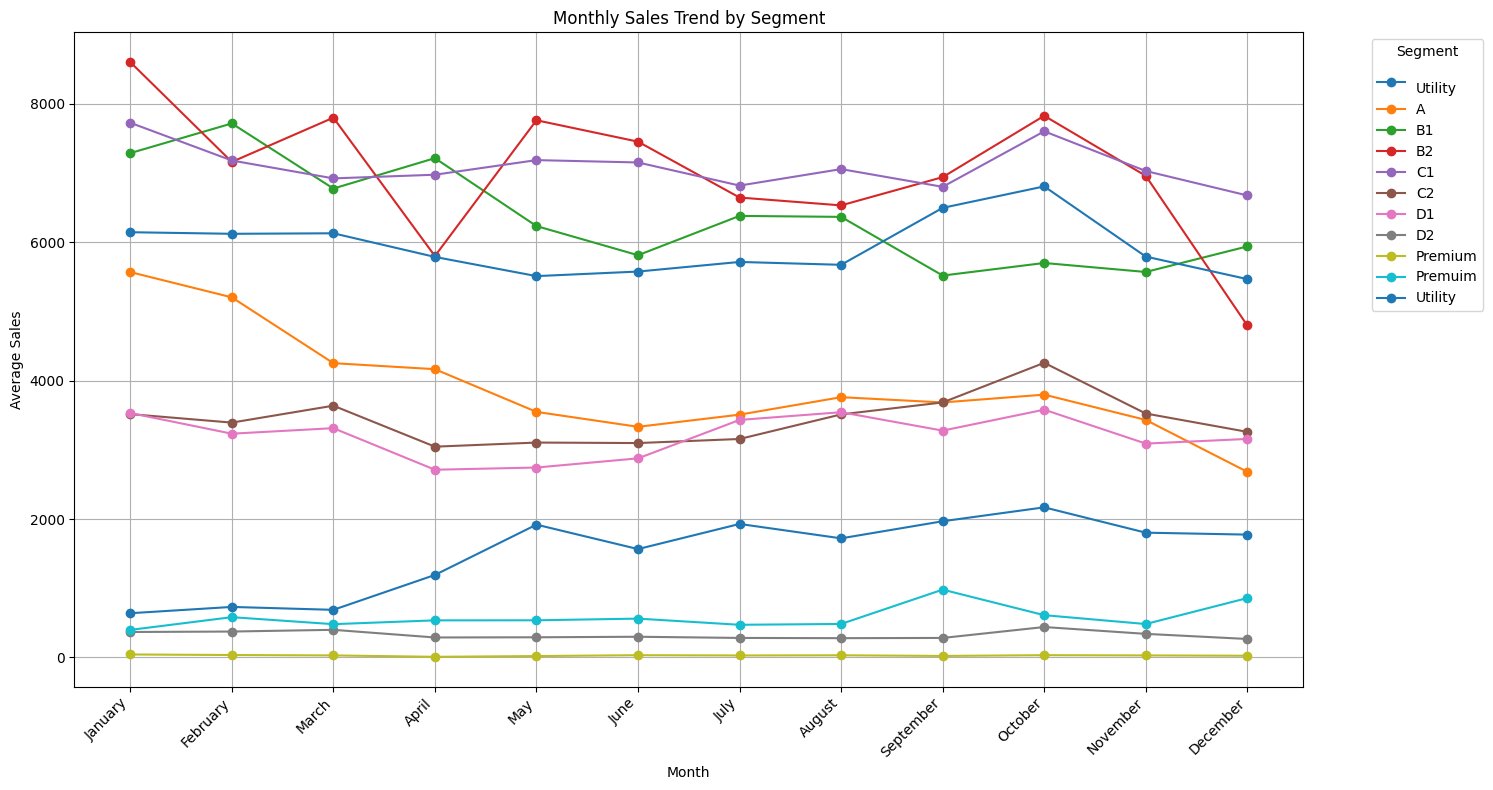

In [32]:
# Plot monthly sales trend for each segment
plt.figure(figsize=(15, 8))
for segment in trending_segment.index:
    plt.plot(trending_segment.columns, trending_segment.loc[segment], marker='o', label=segment)

plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Monthly Sales Trend by Segment')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

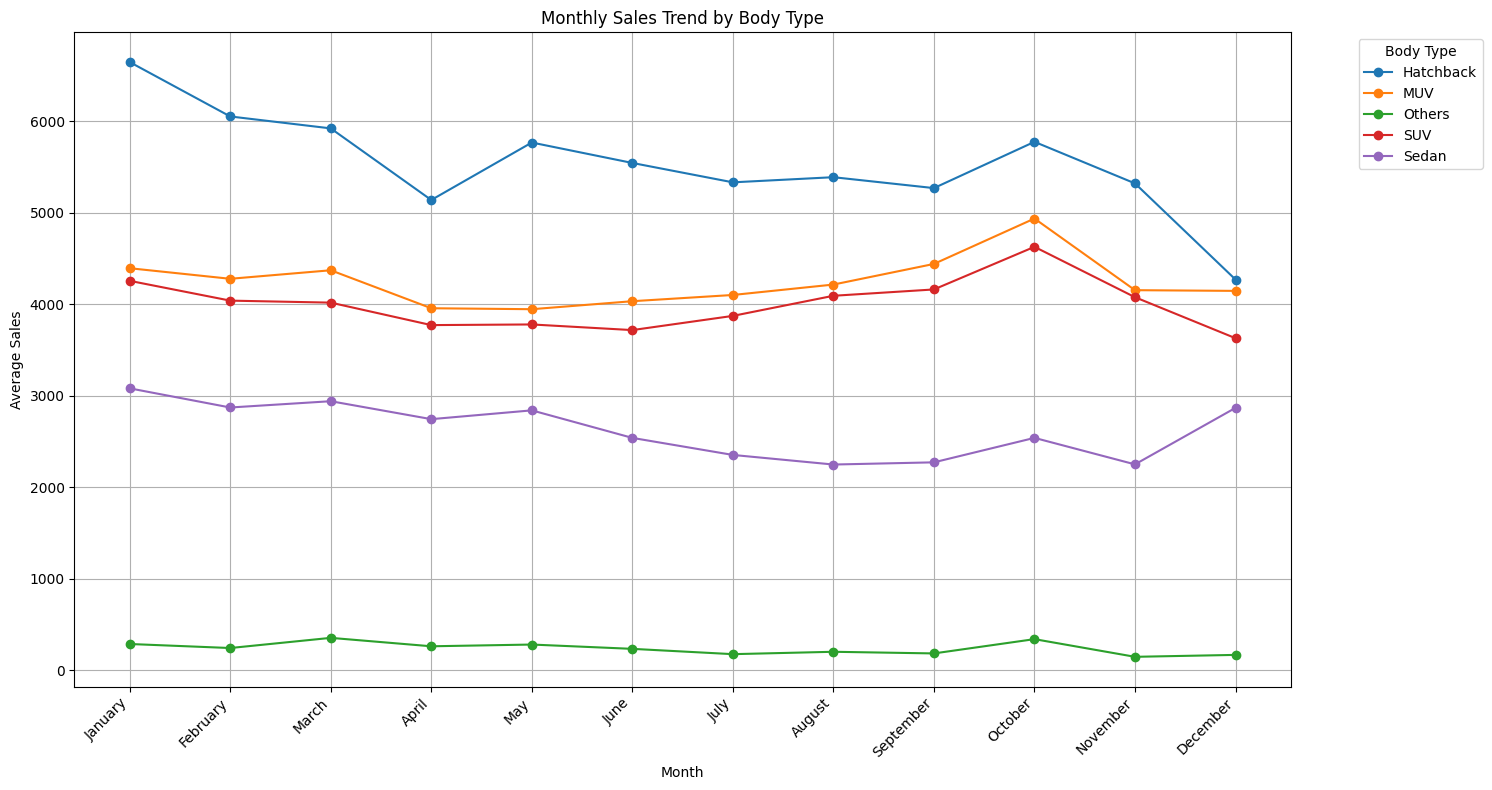

In [33]:
# Plot monthly sales trend for each body type
plt.figure(figsize=(15, 8))
for body_type in trending_body_type.index:
    plt.plot(trending_body_type.columns, trending_body_type.loc[body_type], marker='o', label=body_type)

plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Monthly Sales Trend by Body Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Body Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()